In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from utils import *

In [2]:
os.getcwd()

'/home/anthony/420/notebooks'

In [3]:
os.makedirs('plots', exist_ok=True)

In [4]:
df = pd.read_csv('../scripts/results_summary.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4536 entries, ce2406bc88ceda4e2fde96bf96fdd2d5 to 9591fefef4086cbf060bc6afdcee4eba
Columns: 225 entries, activation_func to std_n_epochs
dtypes: bool(1), float64(219), int64(2), object(3)
memory usage: 7.8+ MB


In [5]:
## get rid of 535 + classification results since they are invalid
df = df[~(get_535_mask(df) & classification_mask(df))] 

In [6]:
## Normalise regression scores to get them into the same range as the classification scores.
val_scores_cols = get_val_scores_cols(df)
train_scores_cols = get_train_scores_cols(df)
scores_cols = np.hstack((val_scores_cols, train_scores_cols))

x = df[regression_mask(df)][scores_cols]
x_min, x_max = -1.0, 1.0 # the range of Pearson's correlation coefficient

x = (x - x_min) / (x_max - x_min)

df.loc[regression_mask(df), scores_cols] = x
df.loc[regression_mask(df), scores_cols].describe()

,val_scores_00,val_scores_01,val_scores_02,val_scores_03,val_scores_04,val_scores_05,val_scores_06,val_scores_07,val_scores_08,val_scores_09,...,train_scores_30,train_scores_31,train_scores_32,train_scores_33,train_scores_34,train_scores_35,train_scores_36,train_scores_37,train_scores_38,train_scores_39
count,640.000000,645.000000,645.000000,640.000000,642.000000,643.000000,643.000000,642.000000,640.000000,643.000000,...,1816.000000,1822.000000,1818.000000,1817.000000,1814.000000,1817.000000,1816.000000,1818.000000,1820.000000,1808.000000
mean,0.879092,0.875410,0.876045,0.880273,0.881025,0.876497,0.879895,0.874846,0.876116,0.878513,...,0.787203,0.782600,0.781607,0.784049,0.777483,0.786392,0.784100,0.781584,0.783219,0.787332
std,0.124107,0.129386,0.125915,0.124530,0.120906,0.123394,0.119610,0.127906,0.130114,0.121386,...,0.200958,0.200359,0.201337,0.200873,0.207605,0.196276,0.200675,0.200602,0.202662,0.198761
min,0.341129,0.450070,0.456429,0.415378,0.371529,0.447194,0.434309,0.341147,0.292694,0.427145,...,0.000000,0.179230,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000
25%,0.847559,0.847339,0.847423,0.847529,0.848244,0.846745,0.845477,0.848407,0.846923,0.847314,...,0.587241,0.561959,0.558304,0.578730,0.538328,0.584320,0.569287,0.564171,0.567057,0.595841
50%,0.906456,0.914787,0.902782,0.907334,0.910376,0.902130,0.903469,0.903549,0.924490,0.902504,...,0.841112,0.828601,0.831767,0.835198,0.827473,0.837489,0.833508,0.828356,0.834006,0.837294
75%,0.968102,0.968806,0.968869,0.970098,0.967769,0.967110,0.969144,0.967702,0.967650,0.968740,...,0.974324,0.973626,0.973644,0.973689,0.973778,0.973296,0.973746,0.973470,0.973370,0.974102
max,0.995054,0.995418,0.995002,0.995048,0.995280,0.996138,0.995044,0.995027,0.995732,0.995345,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Sets

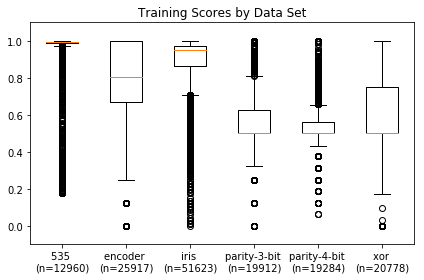

In [7]:
masks = (df['dataset'] == dataset for dataset in datasets)
labels = datasets

fig, ax = make_n_way_boxplot(df, True, 
                  masks, labels, 
                  'train_scores', 
                  'Training Scores by Data Set', double_plot=False)

ax.set_ylim(-0.1, 1.1)
fig.savefig('plots/training_scores_by_data_set.png', bbox_inches='tight')

In [8]:
print(df.groupby('dataset').median()['median_train_scores'].round(4).to_latex())

\begin{tabular}{lr}
\toprule
{} &  median\_train\_scores \\
dataset      &                      \\
\midrule
535          &               0.9900 \\
encoder      &               0.6250 \\
iris         &               0.9432 \\
parity-3-bit &               0.5000 \\
parity-4-bit &               0.5000 \\
xor          &               0.5000 \\
\bottomrule
\end{tabular}



# Adding Noise

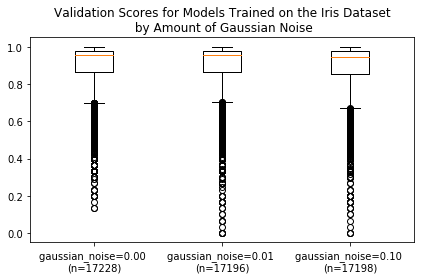

In [9]:
levels_of_noise = list(sorted(df['gaussian_noise'].unique()))

masks = [df['gaussian_noise'] == z for z in levels_of_noise]
labels = ['gaussian_noise=%.2f' % z for z in levels_of_noise]

fig, axes = make_n_way_boxplot(df, iris_mask(df), 
                             masks, labels, 
                             'val_scores', 
                             'Validation Scores for Models Trained on the Iris Dataset\n'
                             ' by Amount of Gaussian Noise', 
                             double_plot=False)
    
fig.savefig('plots/validation_scores_by_amount_of_gaussian_noise.png', bbox_inches='tight')

In [10]:
print(df.groupby('gaussian_noise').median()['median_val_scores'].round(4).to_latex())

\begin{tabular}{lr}
\toprule
{} &  median\_val\_scores \\
gaussian\_noise &                    \\
\midrule
0.00           &             0.9423 \\
0.01           &             0.9398 \\
0.10           &             0.9333 \\
\bottomrule
\end{tabular}



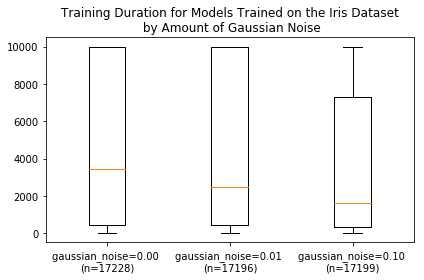

In [11]:
fig, axes = make_n_way_boxplot(df, iris_mask(df), 
                             masks, labels, 
                             'n_epochs', 
                             'Training Duration for Models Trained on the Iris Dataset\n'
                             ' by Amount of Gaussian Noise', 
                             double_plot=False)
    
fig.savefig('plots/training_duration_by_amount_of_gaussian_noise.png', bbox_inches='tight')

In [12]:
df_iris = df[iris_mask(df)]
n_epochs_cols = get_n_epochs_cols(df)

median_epochs = []

for z in levels_of_noise:
    median_epochs.append(df_iris.loc[(df['gaussian_noise'] == z), n_epochs_cols].median().median() + 1) 
    
    
print(pd.DataFrame({'Gaussian Noise Standard Deviation': levels_of_noise, 
                    'Median Training Duration': median_epochs}).round(4).to_latex(index=False))

\begin{tabular}{rr}
\toprule
 Gaussian Noise Standard Deviation &  Median Training Duration \\
\midrule
                              0.00 &                   3489.00 \\
                              0.01 &                   2438.75 \\
                              0.10 &                   1611.25 \\
\bottomrule
\end{tabular}



# Batch Size

In [13]:
def get_batch_size_masks_labels():
    batch_sizes = list(sorted(df['batch_size'].unique()))
    batch_sizes = np.hstack([batch_sizes[1:], batch_sizes[0]]) # put negative one at the end since it represent a batch size of N

    batch_size_masks = [df['batch_size'] == n for n in batch_sizes]
    batch_size_labels = []

    for n in batch_sizes:
        if n > 0:
            batch_size_labels.append('batch_size=%d' % n)
        else:
            batch_size_labels.append('batch_size=N')
            
    return batch_size_masks, batch_size_labels

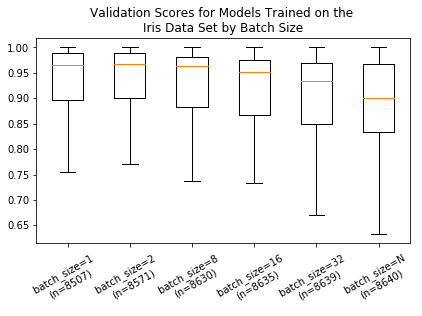

In [14]:
fig, ax = make_n_way_boxplot(df, iris_mask(df), 
                  *get_batch_size_masks_labels(), 
                  'val_scores', 
                  'Validation Scores for Models Trained on the \nIris Data Set by Batch Size',
                            double_plot=False, show_fliers=False)

for tick in ax.get_xticklabels():
    tick.set_rotation(30)
    
fig.savefig('plots/validation_scores_by_batch_size.png', bbox_inches='tight')

In [15]:
batch_sizes = list(sorted(df['batch_size'].unique()))
batch_sizes = np.hstack([batch_sizes[1:], batch_sizes[0]]) # put negative one at the end since it represent a batch size of N

batch_size_masks = [df['batch_size'] == n for n in batch_sizes]
batch_size_labels = []
batch_size_median_val_scores = []

for n, batch_size_mask in zip(batch_sizes, batch_size_masks):
    if n > 0:
        batch_size_labels.append('%d' % n)
    else:
        batch_size_labels.append('N')
        
    median_val_score = df.loc[iris_mask(df) &  batch_size_mask, val_scores_cols].median(axis=1).median()
    batch_size_median_val_scores.append(median_val_score)
    
vals = {'Batch Size': batch_size_labels, 'Median Validation Scores': batch_size_median_val_scores}
print(pd.DataFrame(vals).round(4).to_latex(index=False))

\begin{tabular}{lr}
\toprule
Batch Size &  Median Validation Scores \\
\midrule
         1 &                    0.9667 \\
         2 &                    0.9667 \\
         8 &                    0.9667 \\
        16 &                    0.9667 \\
        32 &                    0.9428 \\
         N &                    0.8920 \\
\bottomrule
\end{tabular}



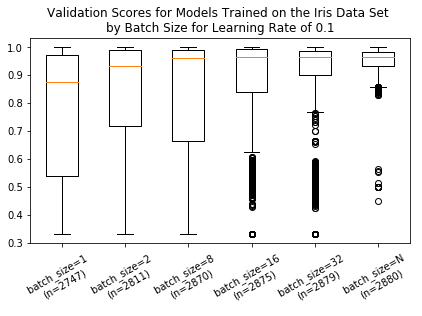

In [16]:
fig, ax = make_n_way_boxplot(df, iris_mask(df) & (df['learning_rate'] == 0.1), 
                               *get_batch_size_masks_labels(), 
                               'val_scores', 
                               'Validation Scores for Models Trained on the Iris Data Set \n'
                               'by Batch Size for Learning Rate of 0.1',
                               double_plot=False, show_fliers=True)

for tick in ax.get_xticklabels():
    tick.set_rotation(30)
    
fig.savefig('plots/validation_scores_by_batch_size_learning_rate_0-1.png', bbox_inches='tight')

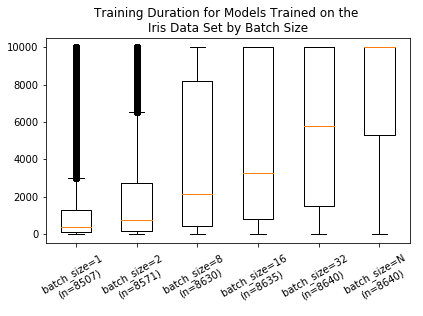

In [17]:
fig, ax = make_n_way_boxplot(df, iris_mask(df), 
                  *get_batch_size_masks_labels(), 
                  'n_epochs', 
                  'Training Duration for Models Trained on the \nIris Data Set by Batch Size',
                            double_plot=False, show_fliers=True)

for tick in ax.get_xticklabels():
    tick.set_rotation(30)
    
fig.savefig('plots/training_duration_by_batch_size.png', bbox_inches='tight')

In [18]:
batch_sizes = list(sorted(df['batch_size'].unique()))
batch_sizes = np.hstack([batch_sizes[1:], batch_sizes[0]]) # put negative one at the end since it represent a batch size of N

batch_size_masks = [df['batch_size'] == n for n in batch_sizes]
batch_size_labels = []
batch_size_median_training_durations = []

for n, batch_size_mask in zip(batch_sizes, batch_size_masks):
    if n > 0:
        batch_size_labels.append('%d' % n)
    else:
        batch_size_labels.append('N')
        
    median_training_duration = df.loc[iris_mask(df) &  batch_size_mask, n_epochs_cols].median(axis=1).median()
    batch_size_median_training_durations.append(median_training_duration + 1)
    
vals = {'Batch Size': batch_size_labels, 'Median Training Duration': batch_size_median_training_durations}
print(pd.DataFrame(vals).astype(np.int, errors='ignore').to_latex(index=False))

\begin{tabular}{lr}
\toprule
Batch Size &  Median Training Duration \\
\midrule
         1 &                       417 \\
         2 &                       758 \\
         8 &                      2448 \\
        16 &                      3866 \\
        32 &                      7815 \\
         N &                     10000 \\
\bottomrule
\end{tabular}



## Shuffle Batches
-

## Learning Task Representation

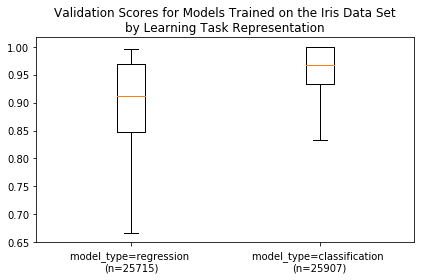

In [19]:
fig, ax = make_n_way_boxplot(df, iris_mask(df), 
                             (regression_mask(df), classification_mask(df)),
                             ('model_type=regression',  'model_type=classification'), 
                             'val_scores', 
                             'Validation Scores for Models Trained on the Iris Data Set\n' 
                             'by Learning Task Representation',
                             double_plot=False, show_fliers=False)
    
fig.savefig('plots/validation_scores_by_clf_type.png', bbox_inches='tight')

In [20]:
iris_regression_mask = iris_mask(df) & (df['clf_type'] == 'MLPRegressor')
iris_classification_mask = iris_mask(df) & (df['clf_type'] == 'MLPClassifier')

regression_median_val_score = df.loc[iris_regression_mask, val_scores_cols].median(axis=1).median()
classification_median_val_score = df.loc[iris_classification_mask, val_scores_cols].median(axis=1).median()

vals = {
    'Learning Task Representation': ['Regression', 'Classification'],
    'Median Validation Score': [regression_median_val_score, classification_median_val_score]
}

print(pd.DataFrame(vals).round(4).to_latex(index=False))

\begin{tabular}{lr}
\toprule
Learning Task Representation &  Median Validation Score \\
\midrule
                  Regression &                   0.9221 \\
              Classification &                   0.9667 \\
\bottomrule
\end{tabular}



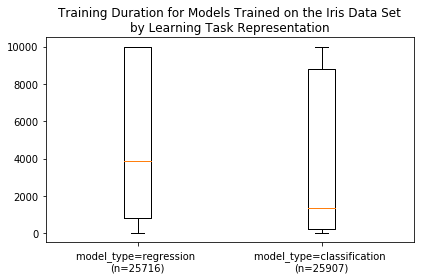

In [21]:
fig, ax = make_n_way_boxplot(df, iris_mask(df), 
                             (regression_mask(df), classification_mask(df)),
                             ('model_type=regression',  'model_type=classification'), 
                             'n_epochs', 
                             'Training Duration for Models Trained on the Iris Data Set\n' 
                             'by Learning Task Representation',
                             double_plot=False, show_fliers=False)
    
fig.savefig('plots/training_duration_by_clf_type.png', bbox_inches='tight')

In [22]:
regression_median_training_duration = df.loc[iris_regression_mask, n_epochs_cols].median(axis=1).median() + 1
classification_median_training_duration = df.loc[iris_classification_mask, n_epochs_cols].median(axis=1).median() + 1

vals = {
    'Learning Task Representation': ['Regression', 'Classification'],
    'Median Training Duration': [regression_median_training_duration, classification_median_training_duration]
}

print(pd.DataFrame(vals).astype(np.int, errors='ignore').to_latex(index=False))

\begin{tabular}{lr}
\toprule
Learning Task Representation &  Median Training Duration \\
\midrule
                  Regression &                      3859 \\
              Classification &                      1812 \\
\bottomrule
\end{tabular}



## Activation Functions

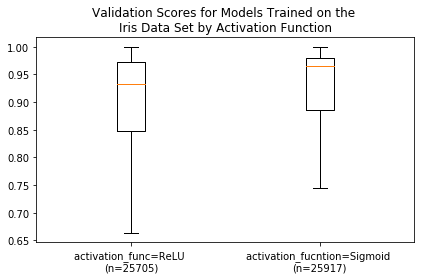

In [23]:
fig, ax = make_n_way_boxplot(df, iris_mask(df),
                             (relu_mask(df), sigmoid_mask(df)),
                             ('activation_func=ReLU',  'activation_fucntion=Sigmoid'),
                             'val_scores', 
                             'Validation Scores for Models Trained on the \nIris Data Set by Activation Function',
                            double_plot=False, show_fliers=False)
    
fig.savefig('plots/validation_scores_by_activation_func.png', bbox_inches='tight')

In [24]:
iris_relu_mask = iris_mask(df) & relu_mask(df)
iris_sigmoid_mask = iris_mask(df) & sigmoid_mask(df)

relu_median_val_score = df.loc[iris_relu_mask, val_scores_cols].median(axis=1).median()
sigmoid_median_val_score = df.loc[iris_sigmoid_mask, val_scores_cols].median(axis=1).median()

vals = {
    'Activation Function': ['ReLU', 'Sigmoid'],
    'Median Validation Score': [relu_median_val_score, sigmoid_median_val_score]
}

print(pd.DataFrame(vals).round(4).to_latex(index=False))

\begin{tabular}{lr}
\toprule
Activation Function &  Median Validation Score \\
\midrule
               ReLU &                   0.9487 \\
            Sigmoid &                   0.9667 \\
\bottomrule
\end{tabular}



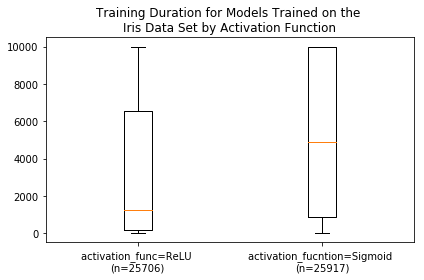

In [25]:
fig, ax = make_n_way_boxplot(df, iris_mask(df),
                             (relu_mask(df), sigmoid_mask(df)),
                             ('activation_func=ReLU',  'activation_fucntion=Sigmoid'),
                             'n_epochs', 
                             'Training Duration for Models Trained on the \nIris Data Set by Activation Function',
                            double_plot=False, show_fliers=False)
    
fig.savefig('plots/training_duration_by_activation_func.png', bbox_inches='tight')

In [26]:
relu_median_training_duration = df.loc[iris_relu_mask, n_epochs_cols].median(axis=1).median() + 1
sigmoid_median_training_duration = df.loc[iris_sigmoid_mask, n_epochs_cols].median(axis=1).median() + 1

vals = {
    'Activation Function': ['ReLU', 'Sigmoid'],
    'Median Training Duration': [relu_median_training_duration, sigmoid_median_training_duration]
}

print(pd.DataFrame(vals).astype(np.int, errors='ignore').to_latex(index=False))

\begin{tabular}{lr}
\toprule
Activation Function &  Median Training Duration \\
\midrule
               ReLU &                      1485 \\
            Sigmoid &                      5868 \\
\bottomrule
\end{tabular}



## Learning Rate

In [27]:
def get_lr_masks_labels():
    learning_rates = list(sorted(df['learning_rate'].unique()))
    
    masks = (df['learning_rate'] == lr for lr in learning_rates)
    labels = ('learning_rate=%0.3f' % lr for lr in learning_rates)
    
    return masks, labels

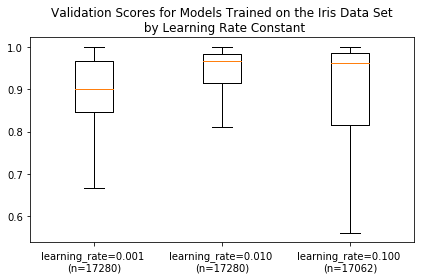

In [28]:
make_n_way_boxplot(df, iris_mask(df), 
                   *get_lr_masks_labels(),
                   'val_scores', 
                   'Validation Scores for Models Trained on the Iris Data Set\n by Learning Rate Constant',
                  double_plot=False, show_fliers=False)

plt.savefig('plots/validation_scores_by_learning_rate.png', bbox_inches='tight')

In [29]:
lr_masks, lr_labels = get_lr_masks_labels()
lr_median_val_scores = [df.loc[iris_mask(df) & lr_mask, val_scores_cols].median(axis=1).median()
                       for lr_mask in lr_masks]

vals = {
    'Learning Rate': ['0.001', '0.01', '0.1'],
    'Median Validation Score': lr_median_val_scores
}

print(pd.DataFrame(vals).round(4).to_latex(index=False))

\begin{tabular}{lr}
\toprule
Learning Rate &  Median Validation Score \\
\midrule
        0.001 &                   0.9333 \\
         0.01 &                   0.9667 \\
          0.1 &                   0.9667 \\
\bottomrule
\end{tabular}



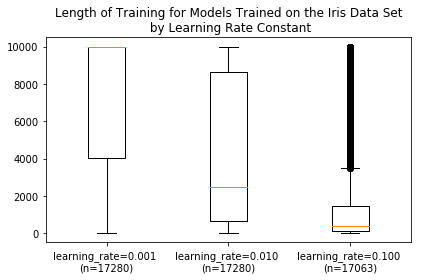

In [30]:
make_n_way_boxplot(df, iris_mask(df), 
                   *get_lr_masks_labels(),
                   'n_epochs', 
                   'Length of Training for Models Trained on the Iris Data Set\n by Learning Rate Constant',
                  double_plot=False, show_fliers=True)

plt.savefig('plots/training_duration_by_learning_rate.png', bbox_inches='tight')

In [31]:
lr_masks, lr_labels = get_lr_masks_labels()
lr_median_training_duration = [df.loc[iris_mask(df) & lr_mask, n_epochs_cols].median(axis=1).median() + 1
                               for lr_mask in lr_masks]

vals = {
    'Learning Rate': ['0.001', '0.01', '0.1'],
    'Median Training Duration': lr_median_training_duration
}

print(pd.DataFrame(vals).astype(np.int, errors='ignore').to_latex(index=False))

\begin{tabular}{lr}
\toprule
Learning Rate &  Median Training Duration \\
\midrule
        0.001 &                     10000 \\
         0.01 &                      2847 \\
          0.1 &                       362 \\
\bottomrule
\end{tabular}



## Momentum

In [32]:
def get_momentum_masks_labels():
    learning_rates = list(sorted(df['momentum'].unique()))
    
    masks = (df['momentum'] == lr for lr in learning_rates)
    labels = ('momentum=%0.1f' % lr for lr in learning_rates)
    
    return masks, labels

In [ ]:
make_n_way_boxplot(df, iris_mask(df), 
                   *get_momentum_masks_labels(),
                   'val_scores', 
                   'Validation Scores for Models Trained on the Iris Data Set\n by Momentum Constant Value',
                   double_plot=False, show_fliers=False)

plt.savefig('plots/validation_scores_by_momentum.png', bbox_inches='tight')

In [ ]:
momentum_masks, momentum_labels = get_momentum_masks_labels()
momentum_median_val_scores = [df.loc[iris_mask(df) & momentum_mask, val_scores_cols].median(axis=1).median()
                       for lr_mask in lr_masks]

vals = {
    'Learning Rate': ['0.001', '0.01', '0.1'],
    'Median Validation Score': momentum_median_val_scores
}

print(pd.DataFrame(vals).round(4).to_latex(index=False))

In [ ]:
make_n_way_boxplot(df, iris_mask(df), 
                   *get_momentum_masks_labels(),
                   'n_epochs', 
                   'Training Duration for Models Trained on the Iris Data Set\n by Momentum Constant Value',
                   double_plot=False, show_fliers=False)

plt.savefig('plots/training_duration_by_momentum.png', bbox_inches='tight')